# NumPy Basics: Arrays and Vectorized Computation

> 由于NumPy提供了一个简单易用的C API，因此很容易将数据传递给由低级语言编写的外部库，外部库也能以NumPy数组的形式将数据返回给Python。这个功能使Python成为一种包装C/C++/Fortran历史代码库的选择，并使被包装库拥有一个动态的、易用的接口。

> NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：
NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少。
NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

In [1]:
import numpy as np
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [3]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 34.9 ms
Wall time: 1.45 s


## <mark>numpy比python list快10-100倍</mark>

## The NumPy ndarray: A Multidimensional Array Object

In [5]:
#正态分布
np.random.randn?

In [6]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [7]:
data * 10

array([[-2.0471,  4.7894, -5.1944],
       [-5.5573, 19.6578, 13.9341]])

In [8]:
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

## <mark>np中的元素必须是相同类型</mark>

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

### Creating ndarrays

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim #ndim维度

2

In [14]:
arr2.shape #shape每个维度的元素个数

(2, 4)

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int32')

## <mark>快捷创建 zeros, ones, empty, arrange</mark>

In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2))

array([[[1.3562e-311, 2.8656e-322],
        [0.0000e+000, 0.0000e+000],
        [0.0000e+000, 6.8212e-043]],

       [[5.8933e-091, 2.7024e-056],
        [6.5504e-043, 3.9258e+179],
        [6.4822e+170, 5.8247e+257]]])

In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

![](http://upload-images.jianshu.io/upload_images/7178691-78ab11f67e7077a6.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Data Types for ndarrays

In [ ]:
np.array()

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int32')

In [23]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [24]:
arrtest = np.array(arr, dtype = np.float64)
arrtest.dtype

dtype('float64')

In [25]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

![](http://upload-images.jianshu.io/upload_images/7178691-2f2d7406a8bc076c.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![](http://upload-images.jianshu.io/upload_images/7178691-5cc31115615737b7.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

> 小数变整数向下取整

In [27]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [28]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [29]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays

In [30]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [31]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [32]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [34]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [35]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [36]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

In [37]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
arr[5]

5

In [39]:
arr[5:8]

array([5, 6, 7])

In [40]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [41]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

## <mark>注意：此处array_slice更改后，变动体现在原array中；但list不会</mark>

In [42]:
list1 = list(range(10))
list1[5:8]

[5, 6, 7]

In [43]:
list_slice = list1[5:8]
list_slice[1] = 2341
list_slice

[5, 2341, 7]

In [44]:
list1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [45]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [46]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [47]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [48]:
arr2d[0][2]

3

In [49]:
arr2d[0, 2]

3

In [50]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

## <mark>先arr.copy()给old value，再操作，然后old value返回</mark>

In [52]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [53]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[1, 0]

array([7, 8, 9])

In [55]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [56]:
x[0]

array([7, 8, 9])

#### Indexing with slices

In [57]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [58]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

## <mark>二维切片类似R</mark>

In [59]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [60]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [62]:
arr2d[1, :2]

array([4, 5])

In [63]:
arr2d[:2, 2]

array([3, 6])

In [64]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [65]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

![](http://upload-images.jianshu.io/upload_images/7178691-9da32d2f4629c304.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Boolean Indexing

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [67]:
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [68]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [69]:
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

In [70]:
data[names == 'Bob', 2:]

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [71]:
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

## <mark>~用于反转条件</mark>

In [72]:
names != 'Bob'
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [73]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

In [74]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

> 注意：Python关键字and和or在布尔型数组中无效。要使用&与|。

In [75]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

In [76]:
data < 0

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False,  True,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True,  True,  True]])

In [77]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

In [78]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy Indexing

## <mark>花式索引 [[]]</mark>

In [79]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [80]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [81]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

> 其实还是arr[]取行，只不过原来取一行arg变成了一个list

In [82]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [83]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [84]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

> 记住，花式索引跟切片不一样，它总是将数据复制到新数组中。

### Transposing Arrays and Swapping Axes

In [2]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [4]:
arr = np.random.randn(6, 3)
arr

array([[-0.20470766,  0.47894334, -0.51943872],
       [-0.5557303 ,  1.96578057,  1.39340583],
       [ 0.09290788,  0.28174615,  0.76902257],
       [ 1.24643474,  1.00718936, -1.29622111],
       [ 0.27499163,  0.22891288,  1.35291684],
       [ 0.88642934, -2.00163731, -0.37184254]])

In [5]:
np.dot(arr.T, arr)

array([[ 2.7743502 , -1.62027588, -2.16980285],
       [-1.62027588,  9.2464443 ,  2.45547143],
       [-2.16980285,  2.45547143,  6.4516321 ]])

In [6]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [90]:
arr.transpose((1, 0, 2))
#这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [91]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [7]:
arr.swapaxes(0, 1)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [92]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions

In [93]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [95]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [96]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([-0.0119,  1.0048,  1.3272, -0.9193, -1.5491,  0.0222,  0.7584,
       -0.6605])

In [97]:
y

array([ 0.8626, -0.01  ,  0.05  ,  0.6702,  0.853 , -0.9559, -0.0235,
       -2.3042])

In [98]:
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

In [99]:
arr = np.random.randn(7) * 5
arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

In [100]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.2623, -0.0915, -0.663 ,  0.3731,  0.6182,  0.45  ,  0.0077])

In [101]:
whole_part

array([-3., -6., -6.,  5.,  3.,  3.,  5.])

In [102]:
np.sqrt(arr)

C:\Users\csu05\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [103]:
arr

array([-3.2623, -6.0915, -6.663 ,  5.3731,  3.6182,  3.45  ,  5.0077])

> Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作：

In [104]:
np.sqrt(arr, arr)

C:\Users\csu05\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [105]:
arr

array([   nan,    nan,    nan, 2.318 , 1.9022, 1.8574, 2.2378])

In [106]:
arr = np.sqrt(arr)
arr

array([   nan,    nan,    nan, 1.5225, 1.3792, 1.3629, 1.4959])

![](http://upload-images.jianshu.io/upload_images/7178691-1d494e73b61c7ced.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![](http://upload-images.jianshu.io/upload_images/7178691-2be79faf68ab6ff8.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![](http://upload-images.jianshu.io/upload_images/7178691-4e38d02a66481530.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![](http://upload-images.jianshu.io/upload_images/7178691-eff1e61e5464159f.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)
![](http://upload-images.jianshu.io/upload_images/7178691-236dba83b6a420cc.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Array-Oriented Programming with Arrays

## <mark>meshgrid网格型函数，input两个一维数组</mark>

In [107]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [108]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [109]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

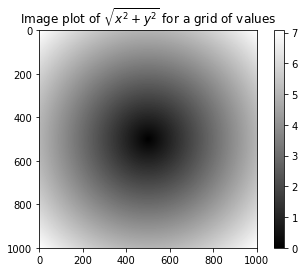

In [110]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [111]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [112]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

## <mark>np的列表推导式 np.where</mark>

In [113]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [114]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

> 这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [115]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [116]:
arr = np.random.randn(4, 4)
arr

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 0.2229,  0.0513, -1.1577,  0.8167],
       [ 0.4336,  1.0107,  1.8249, -0.9975],
       [ 0.8506, -0.1316,  0.9124,  0.1882]])

In [117]:
arr > 0

array([[False, False, False, False],
       [ True,  True, False,  True],
       [ True,  True,  True, False],
       [ True, False,  True,  True]])

## <mark>where中可以是标量、数组、混合</mark>

In [118]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2, -2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2, -2],
       [ 2, -2,  2,  2]])

In [119]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 2.    ,  2.    , -1.1577,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.9975],
       [ 2.    , -0.1316,  2.    ,  2.    ]])

### Mathematical and Statistical Methods

In [120]:
arr = np.random.randn(5, 4)
arr

array([[ 2.1695, -0.1149,  2.0037,  0.0296],
       [ 0.7953,  0.1181, -0.7485,  0.585 ],
       [ 0.1527, -1.5657, -0.5625, -0.0327],
       [-0.929 , -0.4826, -0.0363,  1.0954],
       [ 0.9809, -0.5895,  1.5817, -0.5287]])

In [121]:
arr.mean()

0.19607051119998253

In [122]:
np.mean(arr)

0.19607051119998253

In [123]:
arr.sum()

3.9214102239996507

## <mark>axis=0计算列</mark>

In [124]:
arr.mean(axis=1)

array([ 1.022 ,  0.1875, -0.502 , -0.0881,  0.3611])

In [125]:
arr.sum(axis=0)

array([ 3.1693, -2.6345,  2.2381,  1.1486])

In [126]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [127]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [128]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [129]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

![](http://upload-images.jianshu.io/upload_images/7178691-a6c6df3ca8e0b98e.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

![](http://upload-images.jianshu.io/upload_images/7178691-866fcde885b1d357.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Methods for Boolean Arrays

## <mark>sum常用于true的计数</mark>

In [130]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

42

In [131]:
arr = np.random.randn(10, 10)
(arr>0).sum(axis=1)

array([5, 6, 4, 5, 2, 5, 2, 4, 7, 4])

In [132]:
bools = np.array([False, False, True, False])
bools.any()

True

In [133]:
bools.all()

False

### Sorting

## <mark>np.sort会返回已排序副本，就地排序会修改数组本身</mark>

In [134]:
arr = np.random.randn(6)
arr

array([ 0.9239, -0.1142,  0.4058,  0.2885, -0.4348,  0.3588])

In [135]:
arr.sort()

In [136]:
arr

array([-0.4348, -0.1142,  0.2885,  0.3588,  0.4058,  0.9239])

In [137]:
arr = np.random.randn(5, 3)
arr

array([[-0.3882,  2.1287,  1.4096],
       [-0.1054,  0.7004,  2.0929],
       [-0.137 , -0.9305,  0.3275],
       [ 1.303 , -1.4094, -0.1441],
       [-0.7164,  0.1036, -1.4957]])

In [138]:
arr.sort(1)
arr

array([[-0.3882,  1.4096,  2.1287],
       [-0.1054,  0.7004,  2.0929],
       [-0.9305, -0.137 ,  0.3275],
       [-1.4094, -0.1441,  1.303 ],
       [-1.4957, -0.7164,  0.1036]])

In [139]:
large_arr = np.random.randn(1000000)
large_arr.sort()

> 顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [140]:
large_arr[int(0.025 * len(large_arr))] # 5% quantile

-1.958801541508945

### Unique and Other Set Logic

In [141]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [142]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [143]:
sorted(set(names))

['Bob', 'Joe', 'Will']

## <mark>np.in1d判断是否在另一个中</mark>

In [144]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

![NumPy中的集合函数](http://upload-images.jianshu.io/upload_images/7178691-80e85ae6b9c89ada.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## File Input and Output with Arrays

In [145]:
arr = np.arange(10)
np.save('some_array', arr)

In [146]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [147]:
np.savez('array_archive.npz', a=arr, b=arr)

In [148]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [150]:
!del some_array.npy

In [151]:
!del array_archive.npz
!del arrays_compressed.npz
# mac uses rm

C:\Users\csu05\Google Drive\coursework\pydata-book\array_archive.npz


The process cannot access the file because it is being used by another process.


## Linear Algebra

In [152]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [153]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [154]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [155]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [156]:
np.dot(x, np.ones(3))

array([ 6., 15.])

## <mark>@可进行矩阵乘法</mark>

In [157]:
x @ np.ones(3)

array([ 6., 15.])

In [158]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 5.7734,  4.1914, -0.9035,  4.047 ,  1.1493],
       [ 4.1914,  7.9319, -0.4105,  1.5329,  0.5898],
       [-0.9035, -0.4105,  5.7593, -2.7437, -7.246 ],
       [ 4.047 ,  1.5329, -2.7437,  5.6957,  4.4591],
       [ 1.1493,  0.5898, -7.246 ,  4.4591,  9.81  ]])

In [159]:
inv(mat) #inverse of a matrix.
mat.dot(inv(mat))

array([[ 1.,  0., -0.,  0., -0.],
       [ 0.,  1.,  0.,  0., -0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  0.,  1.]])

In [160]:
q, r = qr(mat)
r

array([[-8.3316, -7.7653,  3.7895, -7.2548, -5.3981],
       [ 0.    , -4.801 , -2.4035,  3.0675,  3.5048],
       [ 0.    ,  0.    , -8.6053,  3.8536, 11.3246],
       [ 0.    ,  0.    ,  0.    , -1.2994, -0.7881],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0542]])

![常用的线性代数函数](http://upload-images.jianshu.io/upload_images/7178691-dcdb66e49e5f70ea.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Pseudorandom Number Generation

In [161]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.0899,  0.706 ,  1.9688,  0.4854],
       [-0.8721,  0.8394, -1.0866, -0.8648],
       [ 1.4058, -1.0539, -0.8548, -0.616 ],
       [ 1.4346,  0.0897, -0.5862,  0.5452]])

> np.random.normal可以设置均值方差，np.random.randn更简便

In [162]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.37 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
%timeit np.random.normal(size=N)

50.1 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [164]:
np.random.seed(1234)

> numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [165]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

![numpy.random中的部分函数](http://upload-images.jianshu.io/upload_images/7178691-97ba09c96dab93a2.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

![](http://upload-images.jianshu.io/upload_images/7178691-6ed04fae3d1178e2.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Example: Random Walks

> +-1概率相等

In [166]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [167]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

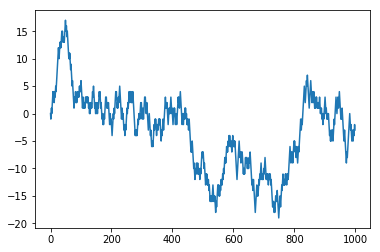

In [168]:
plt.plot(walk[:1000])

In [169]:
np.random.seed(12345)

In [170]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [171]:
walk.min()

-3

In [172]:
walk.max()

31

In [173]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

## <mark>一行一个随机漫步</mark>

In [174]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [175]:
walks.max()

138

In [176]:
walks.min()

-133

In [177]:
hits30 = (np.abs(walks) >= 30).any(1)  #一行中的any
hits30

array([False,  True, False, ..., False,  True, False])

In [178]:
hits30.sum() # Number that hit 30 or -30

3410

In [179]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times

array([735, 409, 253, ..., 327, 453, 447], dtype=int64)

In [180]:
crossing_times.mean()

498.8897360703812

In [181]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion

In [1]:
import numpy as np

In [3]:
arr = np.zeros((4, 4))

In [4]:
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
arr[:, np.newaxis, :]

array([[[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]]])